In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Selection/import

In [2]:
data = pd.read_csv("D:\RD\BITS -PG_AIML\Course 3 Classification\Assignment4\credit card clients  Data.csv")

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Data Preprocessing



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
#dropping the id column
data = data.drop('ID', axis =1)


In [7]:
#Define features and traget

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [8]:
#splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42, stratify =y)

In [9]:
#Feature Scaling(As SVM is senisitive to scale)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



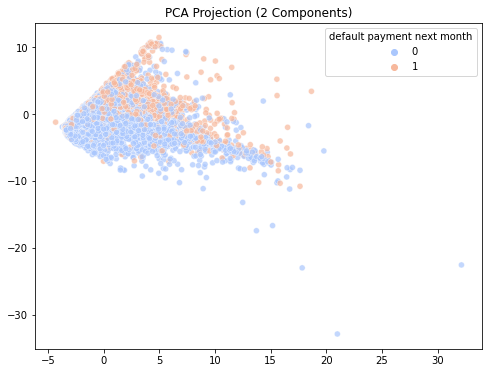

In [10]:
# Applying PCA to check for linearity
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaler.fit_transform(X))
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='coolwarm', alpha=0.7)
plt.title('PCA Projection (2 Components)')
plt.show()

##The classes overlap quite a lot, which means clear linear separation is not possible, and that a non-linear SVM kernel like RBF might perform better than linear models.


###   Model Implementation

In [11]:
#Building the model

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)



Initial SVM Performance:
Accuracy: 0.816
Precision: 0.6651851851851852
Recall: 0.3383571966842502
F1 Score: 0.4485514485514486


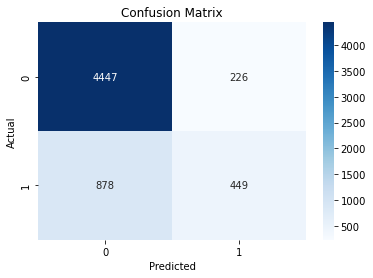

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.34      0.45      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000



In [13]:
# Accuracy
print("\nInitial SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision, Recall, F1
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


### Model Hyperparameter Tunning

In [14]:
param_dist = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1],
    'kernel': ['rbf', 'linear']
}

##As the overall data is taking too long to process, i ll be taking sample of the data for hyperparameter tuning using random search
X_sample, _, y_sample, _ = train_test_split(X_train_scaled, y_train, train_size=5000, stratify=y_train, random_state=42)

random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=5, cv=3, n_jobs=-1, verbose=2)
random_search.fit(X_sample, y_sample)
print("\nBest Parameters:", random_search.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}


### Model Evaluation


Performance After Hyperparameter Tuning:
Accuracy: 0.8166666666666667
Precision: 0.6810207336523126
Recall: 0.32177844762622454
F1-Score: 0.43705220061412486


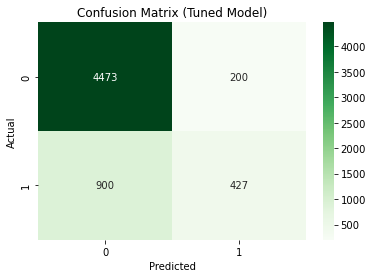

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.68      0.32      0.44      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



In [15]:
y_pred_best = random_search.best_estimator_.predict(X_test_scaled)
print("\nPerformance After Hyperparameter Tuning:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1-Score:", f1_score(y_test, y_pred_best))

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (Tuned Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred_best))


### Conclusion and Analysis 

In [16]:
sample_indices = np.random.choice(range(len(X_test_scaled)), size=2, replace=False)

print("\nModel Interpretation on Random Samples:")
for idx in sample_indices:
    print(f"\nSample Index: {idx}")
    print("Features:", X_test.iloc[idx].to_dict())
    print("Actual Label:", y_test.iloc[idx])
    print("Predicted Label:", y_pred_best[idx])


Model Interpretation on Random Samples:

Sample Index: 2062
Features: {'LIMIT_BAL': 90000, 'SEX': 2, 'EDUCATION': 3, 'MARRIAGE': 1, 'AGE': 53, 'PAY_0': 0, 'PAY_2': 0, 'PAY_3': 0, 'PAY_4': 0, 'PAY_5': 0, 'PAY_6': 0, 'BILL_AMT1': 87235, 'BILL_AMT2': 88338, 'BILL_AMT3': 78994, 'BILL_AMT4': 50095, 'BILL_AMT5': 48987, 'BILL_AMT6': 49519, 'PAY_AMT1': 4000, 'PAY_AMT2': 2602, 'PAY_AMT3': 2000, 'PAY_AMT4': 3000, 'PAY_AMT5': 2000, 'PAY_AMT6': 5000}
Actual Label: 0
Predicted Label: 0

Sample Index: 5816
Features: {'LIMIT_BAL': 300000, 'SEX': 2, 'EDUCATION': 2, 'MARRIAGE': 1, 'AGE': 34, 'PAY_0': -2, 'PAY_2': -2, 'PAY_3': -2, 'PAY_4': -2, 'PAY_5': -2, 'PAY_6': -2, 'BILL_AMT1': 205064, 'BILL_AMT2': -86, 'BILL_AMT3': -86, 'BILL_AMT4': 2014, 'BILL_AMT5': -185, 'BILL_AMT6': 1815, 'PAY_AMT1': 0, 'PAY_AMT2': 0, 'PAY_AMT3': 2100, 'PAY_AMT4': 0, 'PAY_AMT5': 2000, 'PAY_AMT6': 5000}
Actual Label: 0
Predicted Label: 0



*** RBF kernel was selected, which confirms that the data is non-linear.

*** Precision is 68% after tuning which means out of all predicted defaults, 68% were correct.

*** Recall is 32% which means model correctly identified 32% of actual defaults.

*** we can use techniques like SMOTE to balance data which may help us improve the recall which may affect the precision.
